In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torchviz

In [2]:
nX, nH, nY = 2, 5, 1

In [3]:
class ThreeLayersNet(nn.Module):
    def __init__(self, nX, nH1, nH2, nY):        
        super(ThreeLayersNet, self).__init__()     # конструктор
         
        self.fc1 = nn.Linear(nX, nH1)             # створення параметрів моделі
        self.fc2 = nn.Linear(nH1, nH2)             # у повнозв'язкових шарах
        self.fc3 = nn.Linear(nH2, nY)
        
          
             
    def forward(self, x):                        # задаємо прямий прохід
        x = self.fc1(x)                          # вихід першого шару
        x = nn.Sigmoid()(x)                      # сигмоїдна активація
        x = self.fc2(x)                          # вихід другого шару
        x = nn.Sigmoid()(x)                      # сигмоїдна активація
        x = self.fc3(x)                          # вихід третього шару
        x = nn.Sigmoid()(x)                      # сигмоїдна активація  
        return x 

In [4]:
X = torch.rand (1200,2)                       
Y = (torch.sum((X - 0.5)**2, axis=1) < 0.1).float().view(-1,1)

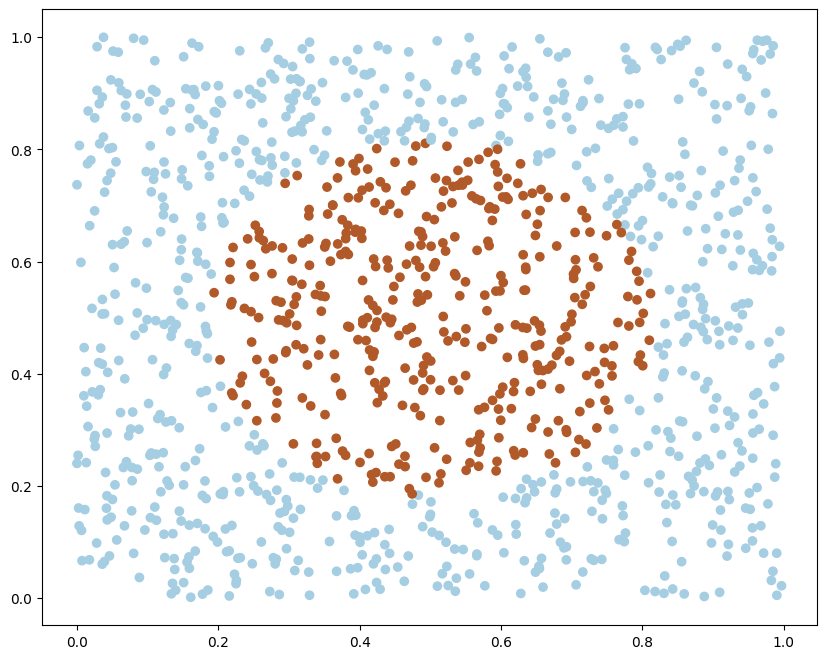

In [8]:
plt.figure (figsize=(10, 8))
plt.scatter(X.numpy()[:,0], X.numpy()[:,1], c=Y.numpy()[:,0],cmap=plt.cm.Paired)        
plt.show()

In [7]:
def fit(model, X,Y, batch_size=100, train=True):    
    model.train(train)                                 
    sumL, sumA, numB = 0, 0, int(len(X)/batch_size) 

    for i in range(0, numB*batch_size, batch_size):          
        xb = X[i: i+batch_size]                          # поточний батч
        yb = Y[i: i+batch_size]                          # тензори поточного батчу

        y = model(xb)                                    # пряме розповсюдження
        L = loss(y, yb)                                  # похибка

        if train:                                        # в режимі навчання
            optimizer.zero_grad()                        # обнуляємо градієнти,        
            L.backward()                                 # обчислюємо градієнти,            
            optimizer.step()                             # підганяємо параметри

        sumL += L.item()                                 # сумарна похибка
        sumA += (y.round() == yb).float().mean()         # точність визначення окремого класу

    return sumL/numB,  sumA/numB   

# Model_BCE_SGD

In [10]:
model_BCE_SGD = ThreeLayersNet(2, 5, 5, 1)                    
loss      = nn.BCELoss()
optimizer = torch.optim.SGD(model_BCE_SGD.parameters(), lr=0.5, momentum=0.8)

In [13]:
                                                         # режим оцінки моделі
print( "before:      loss: %.4f accuracy: %.4f" %  fit(model_BCE_SGD, X,Y) )
 
epochs = 1000                                            # число епох
for epoch in range(epochs):                              # епоха: прохід
    L,A = fit(model_BCE_SGD, X, Y)                             # по всьому датасету
     
    if epoch % 100 == 0 or epoch == epochs-1:                 
        print(f'epoch: {epoch:5d} loss: {L:.4f} accuracy: {A:.4f}' ) 

before:      loss: 0.6485 accuracy: 0.6667
epoch:     0 loss: 0.6469 accuracy: 0.6667
epoch:   100 loss: 0.6367 accuracy: 0.6667
epoch:   200 loss: 0.2817 accuracy: 0.8867
epoch:   300 loss: 0.0773 accuracy: 0.9700
epoch:   400 loss: 0.0578 accuracy: 0.9758
epoch:   500 loss: 0.0506 accuracy: 0.9783
epoch:   600 loss: 0.0469 accuracy: 0.9825
epoch:   700 loss: 0.0750 accuracy: 0.9658
epoch:   800 loss: 0.0667 accuracy: 0.9742
epoch:   900 loss: 0.0379 accuracy: 0.9850
epoch:   999 loss: 0.0346 accuracy: 0.9867


In [14]:
print(model_BCE_SGD)

ThreeLayersNet(
  (fc1): Linear(in_features=2, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=5, bias=True)
  (fc3): Linear(in_features=5, out_features=1, bias=True)
)


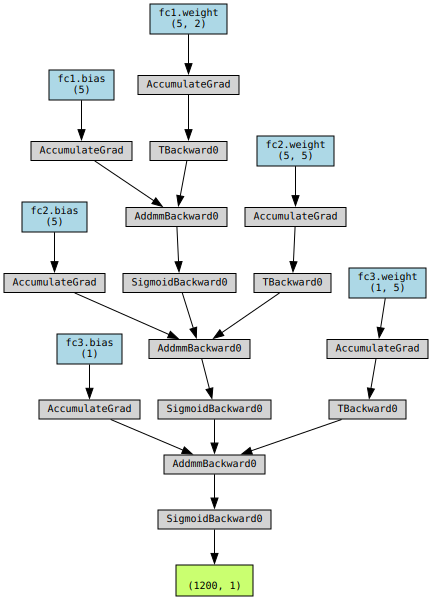

In [16]:
torchviz.make_dot(model_BCE_SGD(X), params = dict(model_BCE_SGD.named_parameters()))

# Model_MSE_Adam

In [18]:
model_MSE_Adam = ThreeLayersNet(2, 5, 5, 1)                 
loss      = nn.MSELoss()
optimizer = torch.optim.Adam(model_MSE_Adam.parameters(), lr = 0.01)

In [19]:
                                                         # режим оцінки моделі
print( "before:      loss: %.4f accuracy: %.4f" %  fit(model_MSE_Adam, X,Y) )
 
epochs = 1000                                            # число епох
for epoch in range(epochs):                              # епоха: прохід
    L,A = fit(model_MSE_Adam, X, Y)                             # по всьому датасету
     
    if epoch % 100 == 0 or epoch == epochs-1:                 
        print(f'epoch: {epoch:5d} loss: {L:.4f} accuracy: {A:.4f}' ) 

before:      loss: 0.2306 accuracy: 0.6667
epoch:     0 loss: 0.2228 accuracy: 0.6667
epoch:   100 loss: 0.0421 accuracy: 0.9700
epoch:   200 loss: 0.0178 accuracy: 0.9817
epoch:   300 loss: 0.0134 accuracy: 0.9858
epoch:   400 loss: 0.0109 accuracy: 0.9892
epoch:   500 loss: 0.0094 accuracy: 0.9900
epoch:   600 loss: 0.0082 accuracy: 0.9917
epoch:   700 loss: 0.0073 accuracy: 0.9917
epoch:   800 loss: 0.0066 accuracy: 0.9933
epoch:   900 loss: 0.0060 accuracy: 0.9942
epoch:   999 loss: 0.0054 accuracy: 0.9950


In [21]:
print(model_MSE_Adam)

ThreeLayersNet(
  (fc1): Linear(in_features=2, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=5, bias=True)
  (fc3): Linear(in_features=5, out_features=1, bias=True)
)


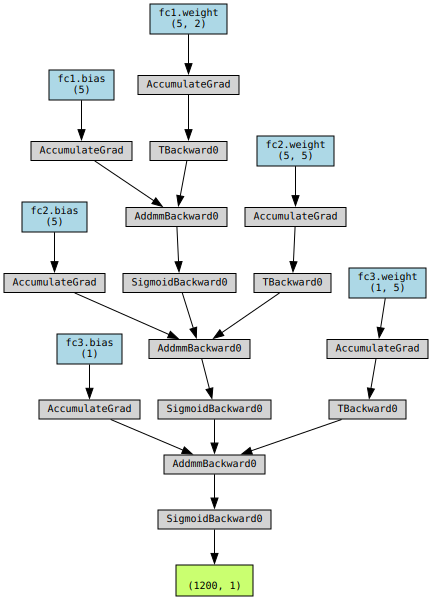

In [23]:
torchviz.make_dot(model_MSE_Adam(X), params = dict(model_MSE_Adam.named_parameters()))

# Outcome:

*Модель, яка використовує для оцінки похибки Mean Squared Error, а в якості оптимізатора - Adam показує кращі результати.*